# 자전거 대여량 예측 모델 실습

## 실습 목표
----
- sklearn의 model을 사용하여 Regressor를 학습한다.
- 생성한 Regressor의 성능 개선을 위한 방법을 이해한다.
- Regressor에서 사용 가능한 주요 성능 지표를 이해한다.

## 문제 정의
----

https://www.kaggle.com/c/bike-sharing-demand

- 시간 - 시간별 타임 스탬프
- 계절 - 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울
- 휴일 - whether the day is considered a holiday
- 주간 - whether the day is neither a weekend nor holiday
- 날씨 -
    - 1: 맑음, Few clouds, Partly cloudy, Partly cloudy
    - 2: 안개낌 + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: 약간 눈내림, 약간 비 + 천둥번개 + Scattered 구름, 약간의 비 + Scattered 구름
    - 4: 소나기 + 우박 + 천둥번개 + 안개, 눈 + 짙은 안개
- 온도 - temperature in Celsius
- 체감온도 - "feels like" temperature in Celsius
- 습도 - relative humidity
- 풍량 - wind speed
- 미가입 - number of non-registered user rentals initiated
- 가입 - number of registered user rentals initiated
- 렌탈수 - number of total rentals (Dependent Variable)

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('exercise2.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## 데이터 탐색

----

In [27]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


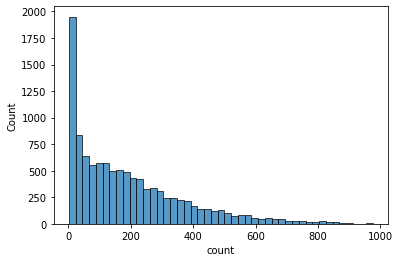

In [28]:
sns.histplot(x=df['count'])

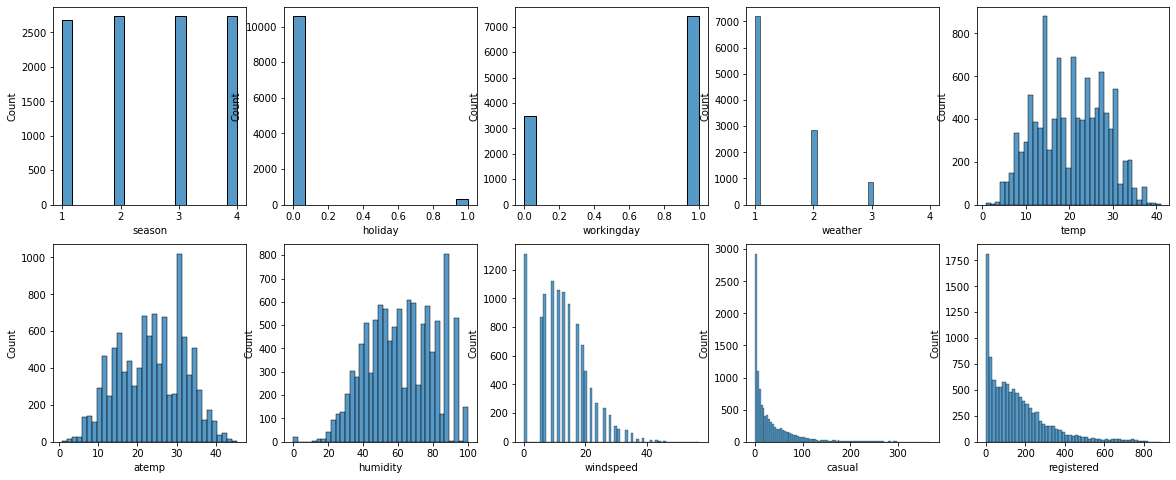

In [29]:
nrows, ncols= 2,5
fig, axs = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(20,8)
for i in range(nrows):
  for j in range(ncols):
    attr= i * ncols + j + 1
    sns.histplot(x=df.columns[attr], data=df, ax=axs[i][j])

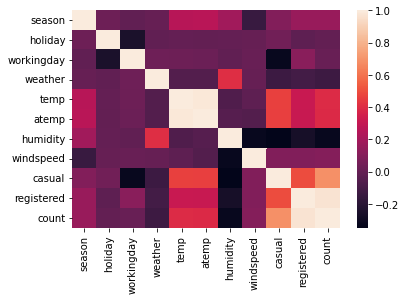

In [30]:
sns.heatmap(df.corr()) #correlation value를 보는 것

## 주요 코드 미리 보기
----
1. 데이터 분할
2. 모델 인스턴스 생성
3. 모델 학습
4. 모델 평가

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error 

Y=df['count']
X=df.drop(['datetime','count'], axis=1, inplace=False)

X_train, X_test , y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
# sklearn에서 train , test set을 나눌때 계속 실험할때 마다 나누는 것이 바뀌면 정확학 비교가 어렵기때문에 seed를 정해주는 것
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)

mean_squared_log_error(y_test,y_pred)

2.2538764933380931e-29

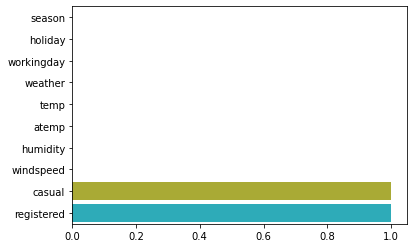

In [32]:
coef= pd.Series(lr_model.coef_, index=X.columns)
# coef_sort=coef.sort_values(ascending=False)
# sns.barplot(x=coef_sort.values, y=coef_sort.index)
sns.barplot(x=coef.values,y=coef.index)

# y=w1x1+w2x2....w9x9했을때 coef(계수)가 casual과 registered는 1 나머지가 0일떄 예측된다
# 잘 생각해보면 casual+regisstered=count이기 때문에 이 둘은 제외해주어야 한다

## 코드 개선하기
----
- Data 관점
    - 의미있는 feature 생성
    - 불필요한 feature 삭제
    - 데이터 형태 변환 : scaling, encoding(범주형 변수인 경우)

- Model 관점
    - Linear Regressor
    - RandomForest Regressor
    - XGBRegressor
    - LGBMRgressor

### Data 관점

#### 의미있는 feature 생성

In [33]:
print(df.head())

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


In [34]:
df['datetime']=df['datetime'].astype('datetime64')# 자전거 이용량은 시간의 영향을 받을 것으로 예측
df['year']=df['datetime'].dt.year
df['month']=df['datetime'].dt.month
df['day']=df['datetime'].dt.day
df['hour']=df['datetime'].dt.hour

#### 불필요한 feature 삭제

In [35]:
df.drop(['datetime','casual','registered'], axis=1, inplace=False)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22


#### 데이터 형태 변환

y를 정규분포로

Text(0.5, 0, 'log(count)')

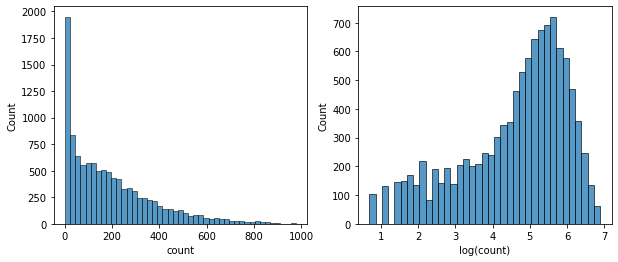

In [36]:
y_log=np.log1p(Y)
 # count에 대해 정규분포를 만들어주기위해 log scale로 변환한다.
# log는 x=0~1사이에서는 가파른 기울기를 보이지만 그 이상은 완만한 기울기를 보인다 즉, 치우쳐져있는 값에 대해
# 고르게 펴주는 효과를 가진다.  log1p()는 들어오는 Y에 대해 log(Y+1)을 해줌으로써 x=0일때 y의 값이 -inf가 되는것을 막아준다.
nrows, ncols= 1,2
fig, axs=plt.subplots(nrows=nrows,ncols=ncols)
fig.set_size_inches(10,4)
sns.histplot(Y,ax=axs[0])
sns.histplot(y_log,ax=axs[1])
axs[0].set_xlabel('count')
axs[1].set_xlabel('log(count)')

##### categorical 변수 원핫인코딩

In [37]:
# 카테고리형, 범주형 변수는 숫자형으로 표현되는것이 아니라 get_dummies를 사용하여 one hot 인코딩을 해주어야 한다.
df=pd.get_dummies(df, columns=['year','month','day','hour','holiday','workingday','season','weather'])

In [38]:
Y=y_log
X=df.drop(['datetime','registered','casual','count'],axis=1,inplace=False) # datetime은 dtype이 datatime64라 scaled_X가 진행되지 않음

In [39]:
print(X.columns)

Index(['temp', 'atemp', 'humidity', 'windspeed', 'year_2011', 'year_2012',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7', 'day_8',
       'day_9', 'day_10', 'day_11', 'day_12', 'day_13', 'day_14', 'day_15',
       'day_16', 'day_17', 'day_18', 'day_19', 'hour_0', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'holiday_0', 'holiday_1', 'workingday_0',
       'workingday_1', 'season_1', 'season_2', 'season_3', 'season_4',
       'weather_1', 'weather_2', 'weather_3', 'weather_4'],
      dtype='object')


##### z-score 변환

In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_X= sc.fit_transform(X)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, Y,test_size=0.3, random_state=42)

In [42]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)
mean_squared_log_error(np.expm1(y_test),np.expm1(y_pred)) 
# y값들을 다 log를 취했기때문에 numpy를 이용하여 exponential 시켜 다시 원위치로 만들어줌

0.34146045131198405

In [43]:
coef=pd.Series(lr_model.coef_, index=X.columns)
coef_sort=coef.sort_values(ascending=False) # ascending = 오름차순
coef_sort.head(10)
# 변수와 변수가 다중 종속성을 가질 수 있기 때문에 주요 feature를 뽑는것이 모델의 성능을 높이는데 도움을 준다.

holiday_0       2.053070e+12
holiday_1       2.053070e+12
season_3        2.021660e+12
season_4        1.801561e+12
month_3         1.322960e+12
month_2         1.322960e+12
month_1         1.311535e+12
workingday_0    8.915541e+11
workingday_1    8.915541e+11
season_2        5.821664e+11
dtype: float64

### Model 관점

In [44]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

lr_model=LinearRegression()
rf_model=RandomForestRegressor(random_state=42)
xgb_model=XGBRegressor(random_state=42)
lgbm_model=LGBMRegressor(random_state=42)

model_list=[lr_model,rf_model,xgb_model,lgbm_model]
for model in model_list:
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  m=model.__class__.__name__
  score=mean_squared_log_error(np.expm1(y_test),np.expm1(y_pred))
  print(f'{m} msle: {score:1.3f}')

LinearRegression msle: 0.341
RandomForestRegressor msle: 0.125
[01:05:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor msle: 0.240
LGBMRegressor msle: 0.110
